In [357]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import math
from collections import Counter
import nltk
import operator

In [205]:
#fuction to split strings and only keep lowercase letters
def re_split(string): #take input as a generic string
    rough_splits = re.split(r"[^a-z]", string) #split and eliminate anything that's not a lowercase letter
    clean_splits = [i for i in rough_splits if i] #remove all white spaces and other junk leftbehind by rough_splits
    return Counter(clean_splits) #turn into dictionary

In [206]:
#function to find the term frequency for a given chapter and sort it with the highest frequency appearing first
def tf_finder(chapter, word_total, dataframe): #take input as the desired part/chapter, total number of words, and the word-document table
    tf_dict = {}
    counts = dataframe.loc[chapter] #extract the word counts from the desired chapter
    sorted_counts = counts.sort_values(ascending = False) #sort them, largest in the beginning
    keys = sorted_counts.keys() #take the keys of the sorted counts
    for key in keys: #iterate thru all keys
        tf_dict[key] = counts[key] / word_total #create new dict value with key, set value to the counts divided by the total word count
    return tf_dict

In [207]:
#read in file to treasure_island_string and convert to lowercase
filename = 'treasure_island.txt'
file = open(filename, "r") #open file
ti_string = file.read().lower() #read and convert to lowercase right away

In [208]:
#split each part into its own object
part1 = ti_string[0 : ti_string.find('part two')] #beginning to part 2
part2 = ti_string[ti_string.find('part two') : ti_string.find('part three')] #part 2 to part 3
part3 = ti_string[ti_string.find('part three') : ti_string.find('part four')] #part 3 to part 4
part4 = ti_string[ti_string.find('part four') : ti_string.find('part five')] #part 4 to part 5
part5 = ti_string[ti_string.find('part five') : ti_string.find('part six')] #part 5 to part 6
part6 = ti_string[ti_string.find('part six') : len(ti_string)] #part 6 to end

parts_text = [part1, part2, part3, part4, part5, part6] #2d list of all text

In [209]:
#create our 2d array of parts split into words.
parts = []
for part in parts_text:
    parts.append(re_split(part)) #call re_split on all parts

In [210]:
#create list of stopwords and remove apostrophes
stopwords = nltk.corpus.stopwords.words('english') #import list of stopwords
i = 0
for word in stopwords:
    stopwords[i] = word.replace("'", '') #replace apostrophes with nothing
    i += 1

In [211]:
#create a list of stopwords and remove them from the list of parts
for stopword in stopwords: #go thru each stopword
    for part in parts: #go thru each part
        part.pop(stopword, '') #remove stop words

In [212]:
#find the total word count in the document
total_word_count = 0
for part in parts:
    total_word_count += sum(part.values()) #sum the list of values accessed from part

In [213]:
#extract all keys and place into one list for the columns of the word frequency vector
all_keys = []
for part in parts:
    all_keys.append(list(part.keys())) #get all potential keys into a 2d list
all_keys_dict = Counter(sum(all_keys, [])) #make all_keys list 1d then take a counter of that
cols = all_keys_dict.keys() #take just the keys from that dict to ensure there are no repeat keys


In [214]:
#initialize dataframe full of zeros with correct column names
df = pd.DataFrame(0, index=np.arange(6), columns=cols)


In [215]:
#set values in dataframe accordingly
i=0
for part in parts: #go thru each part
    for key in part: #go thru each key in each part
        df.at[i, key] = part[key] #set the value at the correct row and key to the corresponding value
    i += 1
print(df)

   part  one  old  buccaneer  sea  dog  admiral  benbow  squire  trelawney  \
0     7   61   34          4   19   18       13      13      22          3   
1     5   38   39          2   27   11        6       6      44         21   
2     7   24    7          1    2    1        0       0       6          0   
3     2   51   12          1    5    3        0       0      23         14   
4     5   38    9          1   31    0        1       1       3          0   
5    10   67   16          4   26    3        0       0       8          0   

   ...  sundays  saints  negress  comfort  chances  oxen  wain  ropes  \
0  ...        0       0        0        0        0     0     0      0   
1  ...        0       0        0        0        0     0     0      0   
2  ...        0       0        0        0        0     0     0      0   
3  ...        0       0        0        0        0     0     0      0   
4  ...        0       0        0        0        0     0     0      0   
5  ...        1

In [216]:
#find term frequency of parts 1-6
part1_tf = tf_finder(0, total_word_count, df) 
part2_tf = tf_finder(1, total_word_count, df)
part3_tf = tf_finder(2, total_word_count, df)
part4_tf = tf_finder(3, total_word_count, df)
part5_tf = tf_finder(4, total_word_count, df)
part6_tf = tf_finder(5, total_word_count, df)
print(part1_tf)
parts_tf = [part1_tf, part2_tf, part3_tf, part4_tf, part5_tf, part6_tf] #add to a list to cycle thru later
        

{'said': 0.002412961047914512, 'one': 0.0019115665444517564, 'man': 0.0017862179185860676, 'captain': 0.001723543605653223, 'doctor': 0.001472846353921845, 'would': 0.0012534862586568896, 'like': 0.0011281376327912005, 'old': 0.001065463319858356, 'rum': 0.0010027890069255116, 'hand': 0.0009714518504590893, 'back': 0.0009401146939926671, 'us': 0.0009401146939926671, 'mother': 0.0009401146939926671, 'door': 0.0009401146939926671, 'upon': 0.0009087775375262449, 'black': 0.0008774403810598226, 'livesey': 0.0008147660681269782, 'see': 0.0007834289116605559, 'blind': 0.0007520917551941337, 'cried': 0.0007520917551941337, 'time': 0.0007207545987277115, 'money': 0.0007207545987277115, 'last': 0.0006894174422612892, 'bill': 0.0006894174422612892, 'squire': 0.0006894174422612892, 'way': 0.0006894174422612892, 'jim': 0.000658080285794867, 'get': 0.000658080285794867, 'take': 0.0006267431293284448, 'put': 0.0006267431293284448, 'could': 0.0006267431293284448, 'little': 0.0005954059728620225, 'two

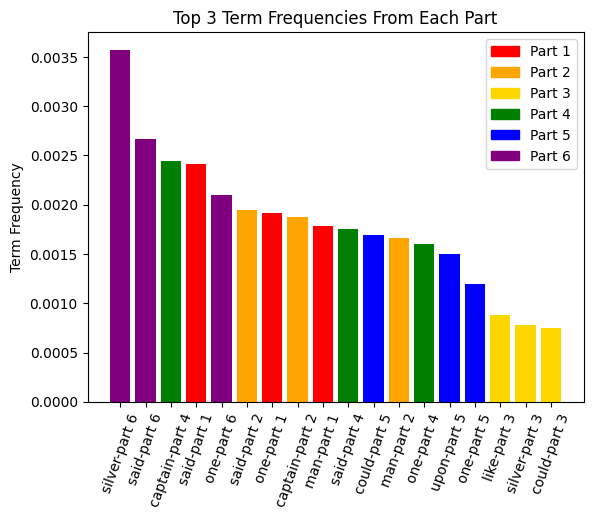

In [301]:
#plot the top 3 term frequencies for each part as a bar graph
top_3 = []
counter = 0
for part in parts_tf: #go thru each part
    counter += 1
    for i in range(3): #cycle 3 times - to get top 3
        top_3.append((list(part.keys())[i] + "-part " + str(counter), list(part.values())[i], counter)) 
        #   ^^^   add a tuple containing the key (with part# added to the string), the value, and the part# on its own   ^^^
sorted_top_3 = sorted(top_3, key=operator.itemgetter(1), reverse=True) #sort the values
keys = [item[0] for item in sorted_top_3] #create a list of keys
values = [item[1] for item in sorted_top_3] #create a list of values
part_from = [item[2] for item in sorted_top_3] #create a list of part#'s

colors = []
possible_colors = ['red', 'orange', 'gold', 'green', 'blue', 'purple'] #possible colors for the 6 parts
for value in part_from: #cycle thru each value in which the key is from
    colors.append(possible_colors[value-1]) #add the correct color to the list

handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in possible_colors] #create shapes for legend
labels = ['Part 1', 'Part 2', 'Part 3', 'Part 4', 'Part 5', 'Part 6'] #labels for legend

fig, ax = plt.subplots() #create plot
ax.bar(keys, values, color=colors) #add bars with keys, values, and colors
plt.xticks(rotation=70) #spin x labels
plt.ylabel('Term Frequency')
plt.title('Top 3 Term Frequencies From Each Part')
plt.legend(handles, labels) #plot legend
plt.show() #display

In [231]:
#find idf, add to dictionary, sort (outputs list of tuples), re dictionarize
idf = {}
for col in df.columns: #cycle thru each word
    word_freq = len(df[df[col] > 0]) #find the number of parts that have the word in it
    
    idf[col] = math.log(6 / (1 + word_freq)) #find the idf for that word (log(parts / 1 + number of parts the word is in))
    
    if idf[col] < 0: #if idf is negative, set it to 0.0
        idf[col] = 0.0
        
sorted_idf_list = sorted(idf.items(), key=operator.itemgetter(1), reverse=True) #sort idf in descneding order - output a list of tuples

sorted_idf = {} #new empty dictionary

for pair in sorted_idf_list: #iterate thru all word & idf pairs in sorted_idf_list
    sorted_idf[pair[0]] = pair[1] #create a new dictionary entry between corresponding word and idf
    
print(sorted_idf)

{'particulars': 1.0986122886681098, 'grace': 1.0986122886681098, 'lodging': 1.0986122886681098, 'plodding': 1.0986122886681098, 'barrow': 1.0986122886681098, 'nut': 1.0986122886681098, 'pigtail': 1.0986122886681098, 'ragged': 1.0986122886681098, 'scarred': 1.0986122886681098, 'livid': 1.0986122886681098, 'tottering': 1.0986122886681098, 'tuned': 1.0986122886681098, 'rapped': 1.0986122886681098, 'connoisseur': 1.0986122886681098, 'lingering': 1.0986122886681098, 'signboard': 1.0986122886681098, 'sittyated': 1.0986122886681098, 'shop': 1.0986122886681098, 'matey': 1.0986122886681098, 'eggs': 1.0986122886681098, 'worked': 1.0986122886681098, 'fierce': 1.0986122886681098, 'commander': 1.0986122886681098, 'coarsely': 1.0986122886681098, 'skipper': 1.0986122886681098, 'accustomed': 1.0986122886681098, 'inns': 1.0986122886681098, 'guest': 1.0986122886681098, 'parlour': 1.0986122886681098, 'stroll': 1.0986122886681098, 'desirous': 1.0986122886681098, 'curtained': 1.0986122886681098, 'sharer': 

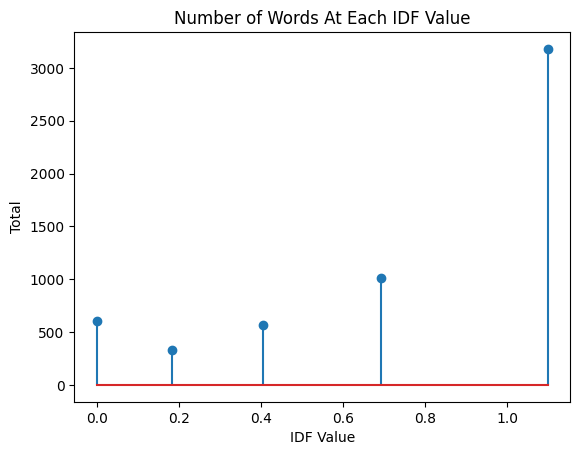

In [296]:
#stem plot of the number of words for each idf value
idf_freqs = Counter(sorted_idf.values()) #find to frequencies of each value
fig, ax = plt.subplots() #create plot
ax.stem(idf_freqs.keys(), idf_freqs.values()) #add stem plot with the possible idf's on the x-axis and the number of words for that idf value on the y
plt.title('Number of Words At Each IDF Value')
plt.xlabel('IDF Value')
plt.ylabel('Total')
plt.show()

In [354]:
#calculate tfidf for all words in all parts
tfidf_df = pd.DataFrame(0, index=np.arange(6), columns=cols) #create empty dataframe of correct size with column names

i = 0 #counter to keep track of row index
for part in parts_tf: #go thru each part term frequency dictionary
    for word in df.columns: #do through each word (in dataframe columns)
        tfidf_df.at[i, word] = part[word] * sorted_idf[word] #set tfidf_df at correct row and column to the term frequency * the word's idf
    i += 1 
    
print(tfidf_df.loc()[0].sort_values(ascending=False))

bill              0.000757
blind             0.000521
parlour           0.000448
road              0.000391
hamlet            0.000379
                    ...   
slipping          0.000000
dived             0.000000
congregated       0.000000
simultaneously    0.000000
coasts            0.000000
Name: 0, Length: 5694, dtype: float64


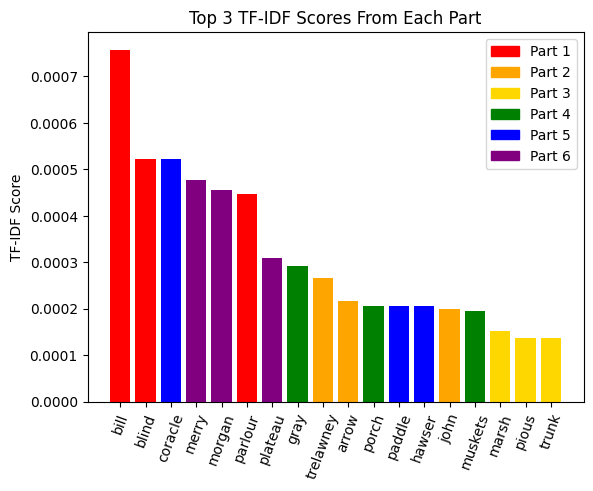

In [319]:
#display a bar chart of the top 3 tfidf scores from each part
top_3_tfidf = []
for i in range(6): #cycle thru each row in tfidf_df
    for j in range(3): #cycle thru 3 times - to find top 3
        ser = tfidf_df.loc()[i].sort_values(ascending=False) #sort row in descendng order to isolate top 3
        top_3_tfidf.append((ser.keys()[j], ser[j], i)) #append tuple with key, score, and part#
sorted_top_3_tfidf = sorted(top_3_tfidf, key=operator.itemgetter(1), reverse=True) #sort the values

keys = [item[0] for item in sorted_top_3_tfidf] #create a list of keys
values = [item[1] for item in sorted_top_3_tfidf] #create a list of values
part_from = [item[2] for item in sorted_top_3_tfidf] #create a list of part#'s

colors = []
possible_colors = ['red', 'orange', 'gold', 'green', 'blue', 'purple'] #possible colors for the 6 parts
for value in part_from: #cycle thru each value in which the key is from
    colors.append(possible_colors[value]) #add the correct color to the list

handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in possible_colors] #create shapes for legend
labels = ['Part 1', 'Part 2', 'Part 3', 'Part 4', 'Part 5', 'Part 6'] #labels for legend

fig, ax = plt.subplots() #create plot
ax.bar(keys, values, color=colors) #add bars with keys, values, and colors
plt.xticks(rotation=70) #spin x labels
plt.ylabel('TF-IDF Score')
plt.title('Top 3 TF-IDF Scores From Each Part')
plt.legend(handles, labels) #plot legend
plt.show() #display

In [338]:
for i in range(6):
    print(tfidf_df.iloc[i]['john'])

0.0
0.0001999703703358845
7.99881481343538e-05
3.99940740671769e-05
0.0
0.0001599762962687076


In [367]:
#tfidf_df = tfidf_df.drop(columns=['bill'])
column = ''
score = 0
for col in tfidf_df.columns:
    if sum(tfidf_df[col]) > score:
        column = col
        score = sum(tfidf_df[col])
print(column)
print(tfidf_df['bill'])
print(df['marsh'])

bill
0    0.000757
1    0.000000
2    0.000000
3    0.000000
4    0.000000
5    0.000000
Name: bill, dtype: float64
0    0
1    0
2    7
3    1
4    0
5    0
Name: marsh, dtype: int64
